<a href="https://colab.research.google.com/github/vkarmarkar123/H-N-Interpretability/blob/main/Classifier_Interpretability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import numpy as np

In [8]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [9]:
rain = pd.read_csv('/content/gdrive/My Drive/weatherAUS.csv')

In [10]:
rain.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [12]:
cols_to_drop = ["Date", "Location", "RainTomorrow", "Rainfall"]

rain.drop(cols_to_drop, axis=1, inplace=True)

In [13]:

missing_props = rain.isna().mean(axis=0)

In [14]:
missing_props

MinTemp          0.010209
MaxTemp          0.008669
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
dtype: float64

In [15]:
over_threshold = missing_props[missing_props >= 0.4]

In [16]:
rain.drop(over_threshold.index,
	          axis=1,
	          inplace=True)

In [17]:
X = rain.drop("RainToday", axis=1)
y = rain.RainToday

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

In [19]:
categorical_pipeline = Pipeline(
	    steps=[
	        ("impute", SimpleImputer(strategy="most_frequent")),
	        ("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),
	    ]
)

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
numeric_pipeline = Pipeline(
	    steps=[("impute", SimpleImputer(strategy="mean")),
	           ("scale", StandardScaler())]
)

In [22]:
cat_cols = X.select_dtypes(exclude="number").columns

In [23]:
num_cols = X.select_dtypes(include="number").columns

In [24]:
from sklearn.compose import ColumnTransformer

In [25]:
full_processor = ColumnTransformer(
	    transformers=[
	        ("numeric", numeric_pipeline, num_cols),
	        ("categorical", categorical_pipeline, cat_cols),
	    ]
)

In [26]:
!pip install xgboost

In [27]:
	import xgboost as xgb

In [28]:
xgb_cl = xgb.XGBClassifier()

In [29]:
print(type(xgb_cl))

<class 'xgboost.sklearn.XGBClassifier'>


In [30]:
# Apply preprocessing
from sklearn.preprocessing import LabelEncoder
X_processed = full_processor.fit_transform(X)
y_imputed = SimpleImputer(strategy="most_frequent").fit_transform(y.values.reshape(-1, 1)).ravel()
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_imputed)


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_processed, y_encoded, stratify=y_encoded, random_state=1121218
)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
from sklearn.metrics import accuracy_score

In [32]:
# Init classifier
xgb_cl = xgb.XGBClassifier()
# Fit
xgb_cl.fit(X_train, y_train)
# Predict
preds = xgb_cl.predict(X_test)
# Score
accuracy_score(y_test, preds)

0.8506531005087309

In [33]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 6.1 MB/s eta 0:00:00


In [34]:
import shap

[03:11:16] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.
[03:11:17] WARNING: /workspace/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


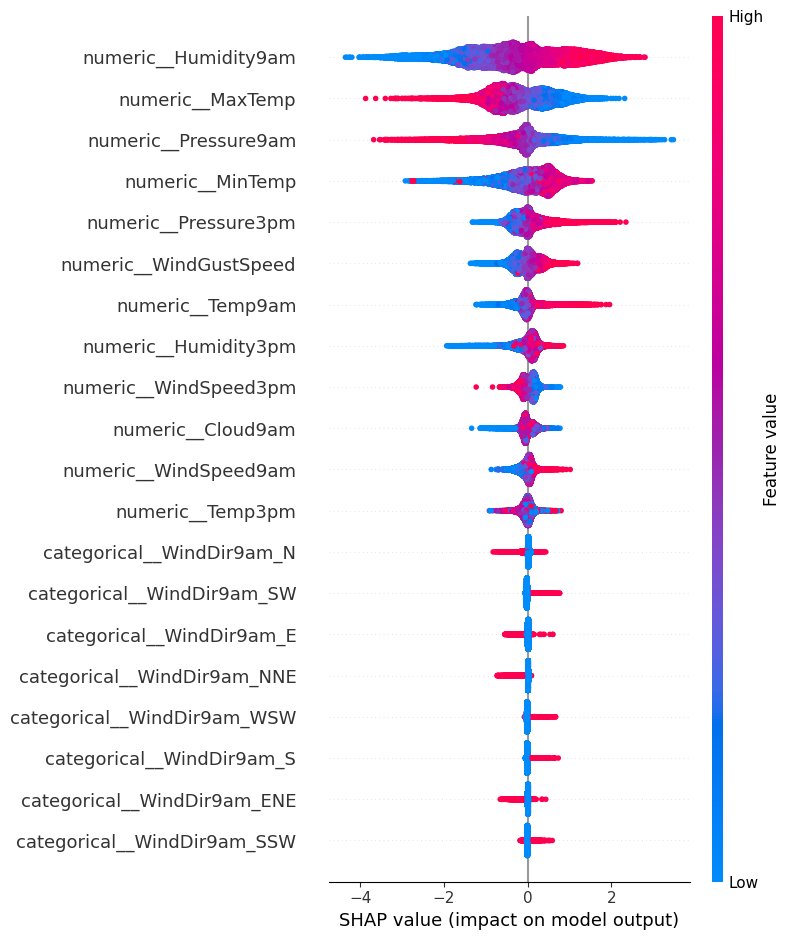

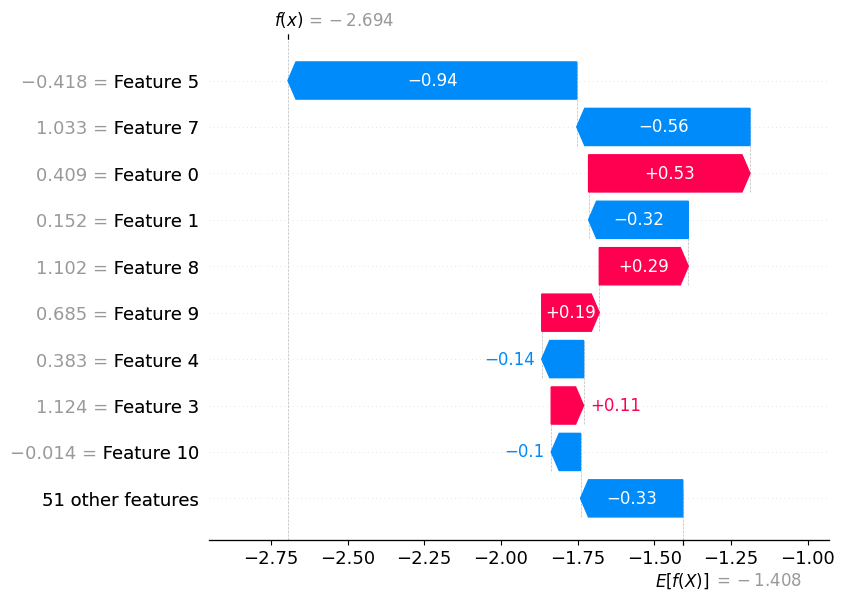

In [35]:
explainer = shap.Explainer(xgb_cl)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, feature_names=full_processor.get_feature_names_out())


shap.plots.waterfall(shap_values[0])

In [36]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=8629dc0d1efe32379476fa560efd932958c9eda50b3437917e78f480dfb4d949
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [37]:
import lime
import lime.lime_tabular

In [38]:
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train,
    feature_names=full_processor.get_feature_names_out(),
    class_names=['No', 'Yes'], # or the output of label_encoder.classes_
    mode='classification'
)

In [39]:
# Choose an instance to explain
instance_index = 1 # for example, explain the second instance in the test set
instance = X_test[instance_index]

In [40]:
exp = explainer.explain_instance(
    data_row=instance,
    predict_fn=xgb_cl.predict_proba # LIME uses predict_proba for classifiers
)

# Visualize the explanation
exp.show_in_notebook(show_table=True, show_all=False)

In [41]:
!pip install seaborn


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

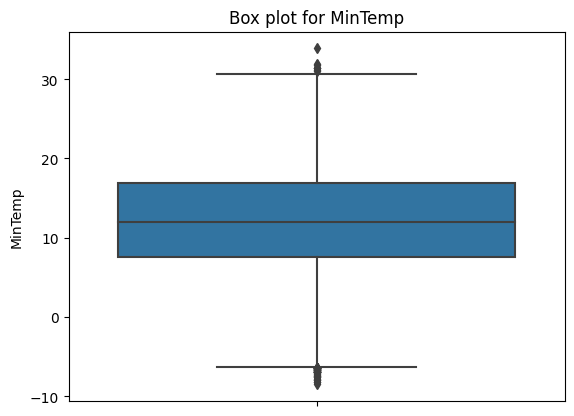

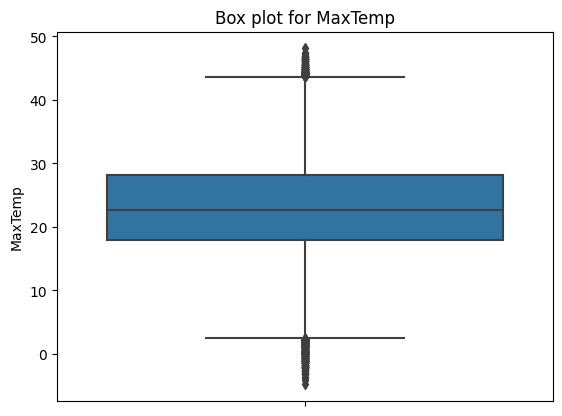

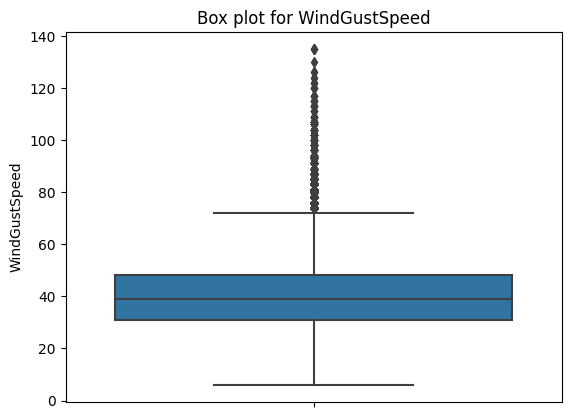

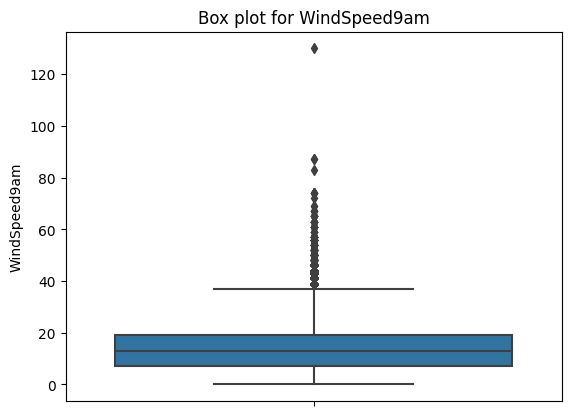

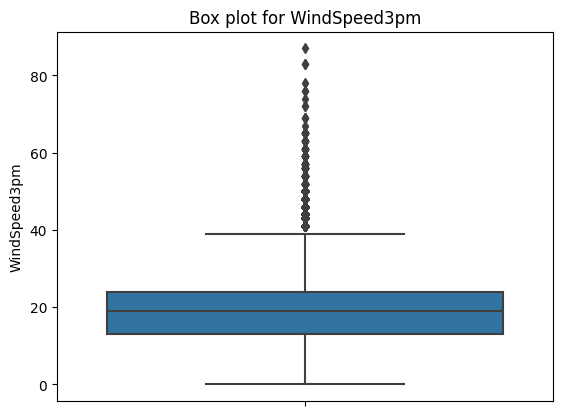

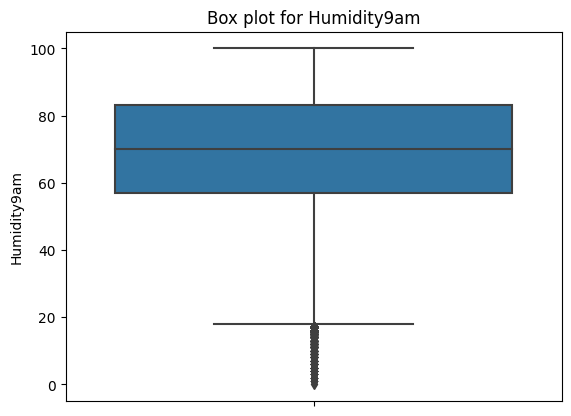

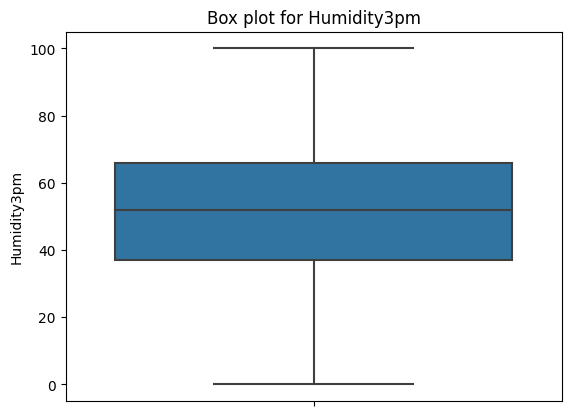

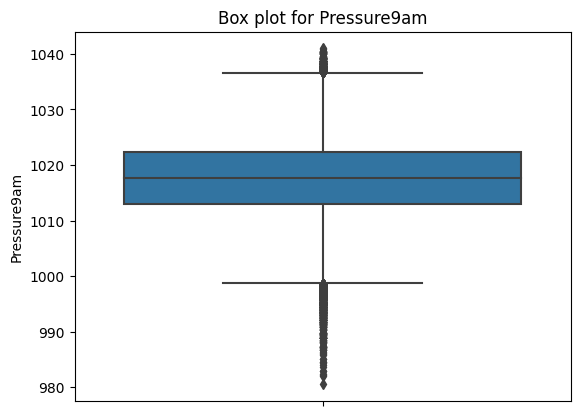

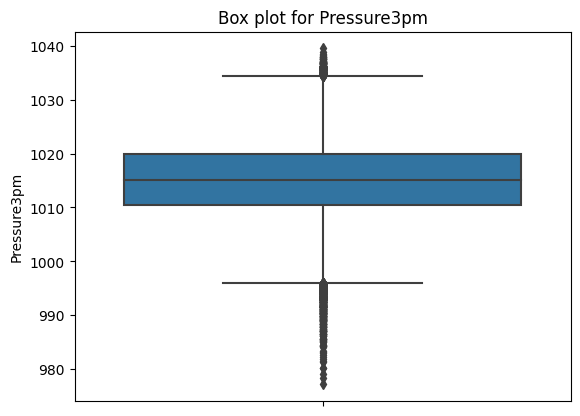

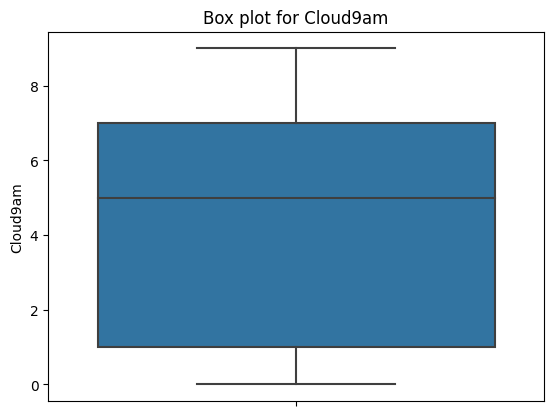

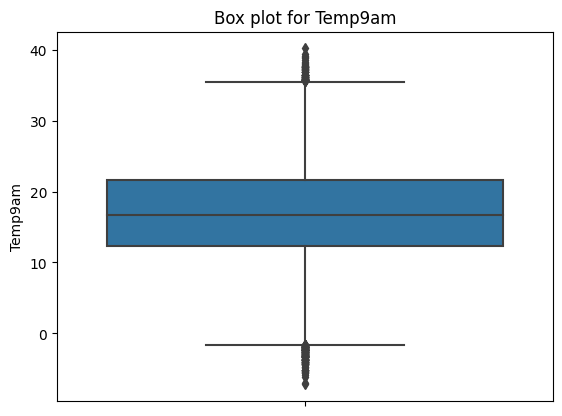

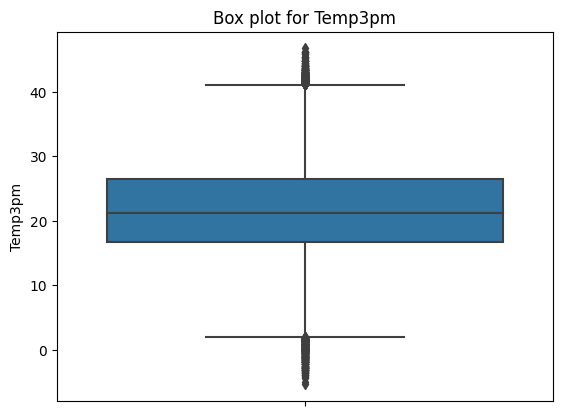

In [47]:
for feature in rain.columns:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(rain[feature]):
        sns.boxplot(y=rain[feature])  # Changed from x to y for better visualization
        plt.title(f'Box plot for {feature}')
        plt.ylabel(feature)  # Changed from xlabel to ylabel
        plt.show()

